In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Categorical columns and perform encoding**

In [ ]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


**Dropping unwanted columns**

In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


**Handling missing values**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

CreditScore         460
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


**Perform descriptive statistics**

In [ ]:
df.drop(columns=['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


**Find outliers**

In [ ]:
qnt = df.drop(columns=['Gender', 'Tenure', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Exited']).quantile(q=[0.25, 0.75])
qnt

,CreditScore,Age,Balance,EstimatedSalary
0.25,584.0,32.0,0.00,51002.1100
0.75,718.0,44.0,127644.24,149388.2475


In [ ]:
Q1 = qnt.iloc[0]
Q3 = qnt.iloc[1]
iqr = Q3 - Q1
iqr

CreditScore           134.0000
Age                    12.0000
Balance            127644.2400
EstimatedSalary     98386.1375
dtype: float64

In [ ]:
upper = qnt.iloc[1] + 1.5*iqr
upper

CreditScore           919.00000
Age                    62.00000
Balance            319110.60000
EstimatedSalary    296967.45375
dtype: float64

**Replace outliers**

In [ ]:
lower = qnt.iloc[0] - 1.5*iqr
lower

CreditScore           383.00000
Age                    14.00000
Balance           -191466.36000
EstimatedSalary    -96577.09625
dtype: float64

In [33]:
df['CreditScore'] = np.where(df['CreditScore']>756, 650.5288, df['CreditScore'])
df['Age'] = np.where(df['Age']>62, 38.9218, df['Age'])

**Perform Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


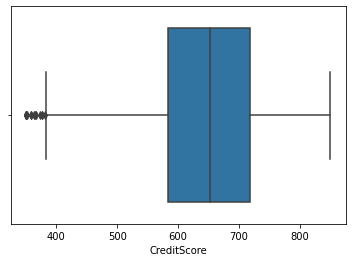

In [ ]:
sns.boxplot(df['CreditScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


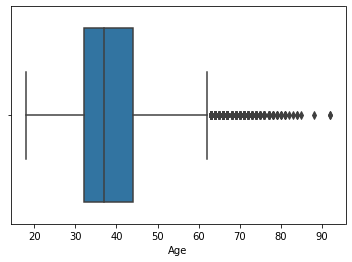

In [ ]:
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


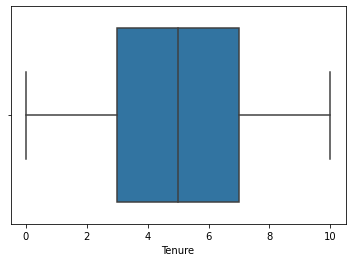

In [ ]:
sns.boxplot(df['Tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


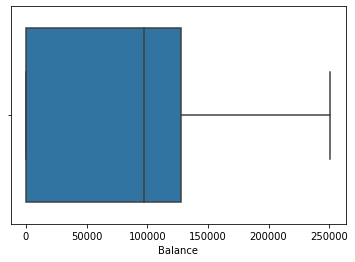

In [ ]:
sns.boxplot(df['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


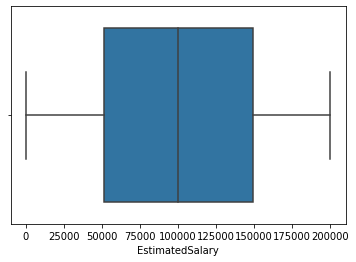

In [ ]:
sns.boxplot(df['EstimatedSalary'])

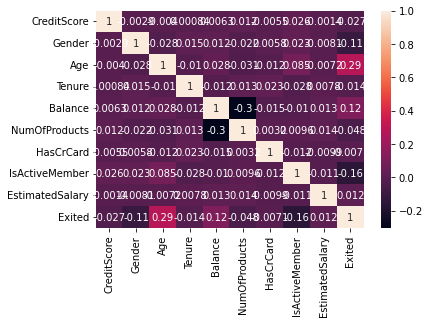

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Split data into dependent and independent variables**


In [ ]:
x = df.iloc[:, :-1]
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**Scale the independent variables**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [ ]:
x

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595, -1.09598752,  0.19816383, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.91241915,  0.29351742, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.09598752, -1.04143285, ...,  0.64609167,
        -1.03067011, -1.07636976]])

**Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




In [ ]:
x_train.shape

(8000, 9)

In [ ]:
x_test.shape

(2000, 9)

In [ ]:
x_train

array([[ 0.17042381, -1.09598752, -0.4693113 , ...,  0.64609167,
        -1.03067011,  1.10838187],
       [-2.31280236,  0.91241915,  0.29351742, ...,  0.64609167,
         0.97024255, -0.74759209],
       [-1.19535058, -1.09598752, -0.94607926, ...,  0.64609167,
        -1.03067011,  1.48746417],
       ...,
       [ 0.90504489,  0.91241915, -0.37395771, ...,  0.64609167,
        -1.03067011,  1.41441489],
       [-0.62627792, -1.09598752, -0.08789694, ...,  0.64609167,
         0.97024255,  0.84614739],
       [-0.28483432, -1.09598752,  0.86563897, ...,  0.64609167,
        -1.03067011,  0.32630495]])

In [ ]:
x_test

array([[-0.55385049, -1.09598752, -0.37395771, ...,  0.64609167,
         0.97024255,  1.61304597],
       [-1.31951189, -1.09598752,  0.10281024, ...,  0.64609167,
        -1.03067011,  0.49753166],
       [ 0.57394806, -1.09598752,  0.29351742, ...,  0.64609167,
         0.97024255, -0.4235611 ],
       ...,
       [-0.75043923,  0.91241915, -0.27860412, ...,  0.64609167,
        -1.03067011,  0.72065149],
       [-0.00547137,  0.91241915, -0.4693113 , ...,  0.64609167,
         0.97024255, -1.54438254],
       [-0.8021731 ,  0.91241915, -0.85072567, ...,  0.64609167,
        -1.03067011,  1.61474887]])